In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("data/promise/ant-1.7.csv")
df.head()

,name,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,org.apache.tools.ant.taskdefs.rmic.RmicAdapter...,3,1,0,10,18,3,1,9,1,...,0.0,0,0.0,0.444444,0,0,32.666667,1,0.6667,0
1,org.apache.tools.ant.taskdefs.optional.perforc...,5,2,0,4,13,0,1,4,4,...,1.0,1,0.7,0.500000,0,0,13.400000,1,0.6000,0
2,org.apache.tools.ant.taskdefs.optional.junit.O...,1,2,0,1,3,0,0,1,1,...,0.0,0,1.0,1.000000,0,0,6.000000,0,0.0000,0
3,org.apache.tools.ant.taskdefs.optional.perforc...,8,1,9,13,20,12,9,4,8,...,0.2,1,0.0,0.406250,0,0,11.000000,1,0.8750,0
4,org.apache.tools.ant.taskdefs.WaitFor,9,3,0,5,26,16,0,5,7,...,1.0,0,0.8,0.388889,0,0,19.000000,2,1.0000,1


In [3]:
X = df.drop(["name",'bug'],axis = 1)
X.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,3,1,0,10,18,3,1,9,1,1.100,106,0.0,0,0.0,0.444444,0,0,32.666667,1,0.6667
1,5,2,0,4,13,0,1,4,4,0.625,76,1.0,1,0.7,0.500000,0,0,13.400000,1,0.6000
2,1,2,0,1,3,0,0,1,1,2.000,7,0.0,0,1.0,1.000000,0,0,6.000000,0,0.0000
3,8,1,9,13,20,12,9,4,8,0.800,101,0.2,1,0.0,0.406250,0,0,11.000000,1,0.8750
4,9,3,0,5,26,16,0,5,7,0.750,185,1.0,0,0.8,0.388889,0,0,19.000000,2,1.0000


In [4]:
y = df["bug"]
y.head()

0    0
1    0
2    0
3    0
4    1
Name: bug, dtype: int64

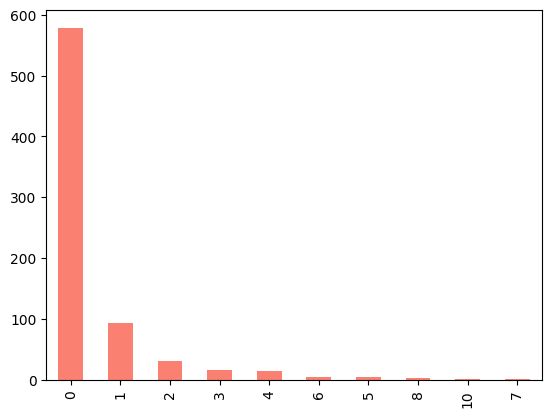

In [6]:
y.value_counts().plot(kind = "bar", color="salmon");

In [7]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test, y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = clf.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred, average='micro' )
acc1, f1

(0.8120805369127517, 0.8120805369127517)

In [9]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=42,k_neighbors=2)
X_sm, y_sm = smote.fit_resample(X,y)

X_sm.shape, y_sm.shape

((4057, 20), (4057,))

In [10]:
y_sm.value_counts()

0     579
1     579
3     579
2     579
6     579
4     579
5     579
8       2
10      1
7       1
Name: bug, dtype: int64

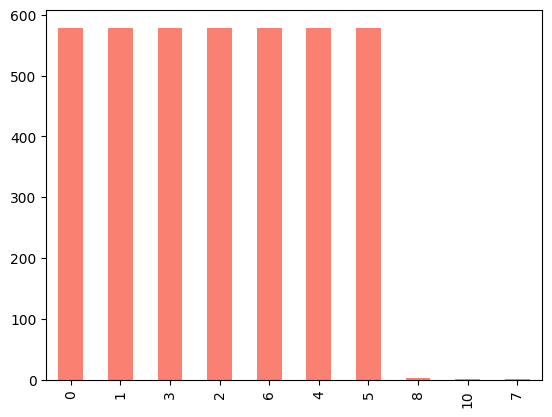

In [11]:
y_sm.value_counts().plot(kind="bar", color = "salmon");

In [211]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_sm, 
                                                    y_sm, 
                                                    test_size = 0.1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1391, 20), (155, 20), (1391,), (155,))

In [212]:
from concrete.ml.sklearn.rf import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 6, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_jobs=-1)

In [213]:
y_pred_clear = clf.predict(X_test)

In [214]:
accuracy_clear = accuracy_score(y_test, y_pred_clear)
f1_score_clear = f1_score(y_test, y_pred_clear, average='micro')
precision_clear =precision_score(y_test, y_pred_clear, average = 'micro')
recall_clear = recall_score(y_test, y_pred_clear, average='micro')

print(f"Accuracy without encryption :{accuracy_clear*100:.4f}")
print(f"F1-score without encryption :{f1_score_clear:.4f}")
print(f"Precision without encryption :{precision_clear:.4f}")
print(f"Recall without encryption :{recall_clear:.4f}")

Accuracy without encryption :92.9032
F1-score without encryption :0.9290
Precision without encryption :0.9290
Recall without encryption :0.9290


In [215]:
y_pred_proba_clear = clf.predict_proba(X_test)
y_pred_proba_clear[:5]

array([[1.74603177e-02, 3.96825403e-02, 4.68253975e-02, 8.94444458e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00793652e-01, 8.84920648e-01, 9.52380967e-03, 2.38095242e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.14285725e-03, 1.26984129e-02, 7.14285725e-02, 9.06349220e-01,
        7.93650805e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.88095241e-01, 7.76984139e-01, 2.93650798e-02, 5.55555564e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.56349209e-01, 1.94444447e-01, 6.35714295e-01, 9.52380967e-03,
        2.38095242e-03, 2.38095242e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [216]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(155, 11)

In [217]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

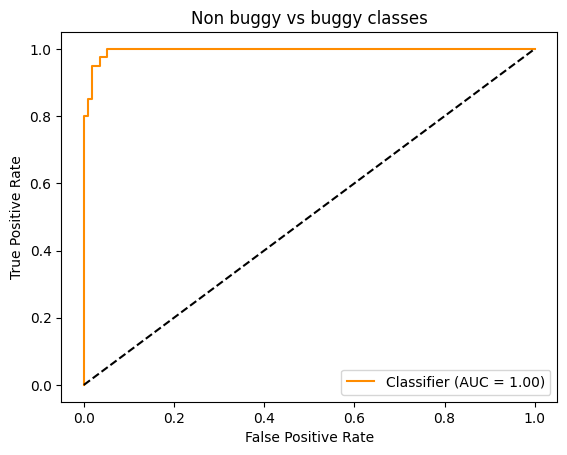

In [218]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_onehot_test[:,class_id], 
                                 y_pred_proba_clear[:,class_id],
                                 color = "darkorange")
plt.plot([0,1],[0,1], "k--")
plt.title("Non buggy vs buggy classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate");

In [219]:
fhe_circuit = clf.compile(X_train.to_numpy())
print(fhe_circuit)

 %0 = _inputs                                  # EncryptedTensor<uint6, shape=(1, 20)>            ∈ [0, 63]
 %1 = transpose(%0)                            # EncryptedTensor<uint6, shape=(20, 1)>            ∈ [0, 63]
 %2 = [[0 0 0 .. ... .. 0 0 0]]                # ClearTensor<uint1, shape=(960, 20)>              ∈ [0, 1]
 %3 = matmul(%2, %1)                           # EncryptedTensor<uint6, shape=(960, 1)>           ∈ [0, 63]
 %4 = [[62] [ 7] ... [10] [ 0]]                # ClearTensor<uint6, shape=(960, 1)>               ∈ [0, 62]
 %5 = less_equal(%3, %4)                       # EncryptedTensor<uint1, shape=(960, 1)>           ∈ [False, True]
 %6 = reshape(%5, newshape=[20 48 -1])         # EncryptedTensor<uint1, shape=(20, 48, 1)>        ∈ [False, True]
 %7 = [[[ 1  1   ... 0  0  0]]]                # ClearTensor<int2, shape=(20, 49, 48)>            ∈ [-1, 1]
 %8 = matmul(%7, %6)                           # EncryptedTensor<int4, shape=(20, 49, 1)>         ∈ [-6, 6]
 %9 = reshape(%8,

In [220]:
print(f"Generating a key for an {fhe_circuit.graph.maximum_integer_bit_width()}-bit circuit")

Generating a key for an 6-bit circuit


In [221]:
import time

In [222]:
time_begin = time.time()
print(fhe_circuit.client.keygen(force = False))
print(f"Key generation time: {time.time() - time_begin:.4f} seconds")

None
Key generation time: 74.1441 seconds


In [223]:
time_begin = time.time()
y_pred_fhe = clf.predict(X_test[:50], execute_in_fhe = True)
print(f"Prediction time: {time.time() - time_begin:.4f} seconds")

Prediction time: 5229.3347 seconds


In [224]:
accuracy_fhe = accuracy_score(y_test[:50],y_pred_fhe)
accuracy_fhe

0.94

In [225]:
print(f"Similarity: {int((y_pred_fhe == y_pred_clear[:50]).mean()*100)}%")

Similarity: 100%


In [ ]:
# quantized_accuracy = accuracy_score(y_test, y_pred_clear)
accuracy_fhe = accuracy_score(y_test[:50], y_pred_fhe)
print(f"Quantized Clear Accuracy: {accuracy_clear*100:.4f}")
print(f"FHE Accuracy: {accuracy_fhe*100:.4f}")
score_difference = abs(accuracy_fhe - accuracy_clear)
print(f"Accuracy score difference: {score_difference:.4f}")

precision_fhe = precision_score(y_test[:50], y_pred_fhe, average="micro")
precision_diff = abs(precision_fhe - precision_clear)
recall_fhe = recall_score(y_test[:50], y_pred_fhe, average="micro")
recall_diff = abs(recall_fhe - recall_clear)
f1_score_fhe = f1_score(y_test[:50], y_pred_fhe, average="micro")
f1_score_diff = abs(f1_score_fhe - f1_score_clear)

print(f"Precision with encryption :{precision_fhe:.4f}")
print(f"Precision score difference: {precision_diff:.4f}")
print(f"Recall with encryption :{recall_fhe:.4f}")
print(f"Recall score difference: {recall_diff:.4f}")
print(f"F1-score with encryption :{f1_score_fhe:.4f}")
print(f"F1-score difference: {f1_score_diff:.4f}")

In [12]:
accuracy_dict = {"State-of-the-art": 79,
                 "Proposed method": 88}

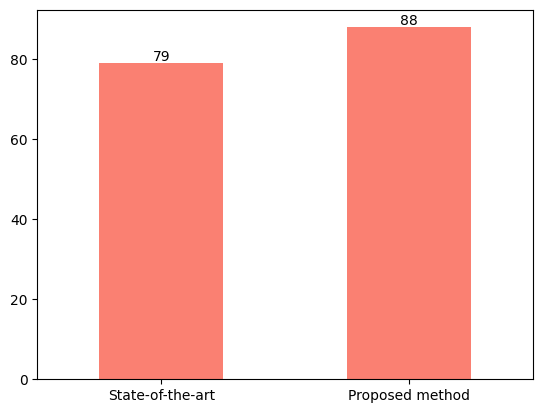

In [27]:
df = pd.DataFrame(accuracy_dict, index = [0])
fig = df.T.plot(kind = 'bar',legend = None, color = "salmon", rot = 0);
fig.bar_label(fig.containers[0]);